<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220630_Number_of_Ofders_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/09/27/number-of-orders-prediction-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv')
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
cols = [i.lower() for i in data.columns]
cols

['id',
 'store_id',
 'store_type',
 'location_type',
 'region_code',
 'date',
 'holiday',
 'discount',
 '#order',
 'sales']

In [4]:
data.columns = cols
data.head()

,id,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             188340 non-null  object 
 1   store_id       188340 non-null  int64  
 2   store_type     188340 non-null  object 
 3   location_type  188340 non-null  object 
 4   region_code    188340 non-null  object 
 5   date           188340 non-null  object 
 6   holiday        188340 non-null  int64  
 7   discount       188340 non-null  object 
 8   #order         188340 non-null  int64  
 9   sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
data.isnull().sum()

id               0
store_id         0
store_type       0
location_type    0
region_code      0
date             0
holiday          0
discount         0
#order           0
sales            0
dtype: int64

In [7]:
unique_cols = ['store_type', 'location_type', 'region_code', 'holiday', 'discount']
print(*(data[i].unique() for i in unique_cols))

['S1' 'S4' 'S3' 'S2'] ['L3' 'L2' 'L1' 'L5' 'L4'] ['R1' 'R4' 'R2' 'R3'] [1 0] ['Yes' 'No']


In [8]:
data.describe()

,store_id,holiday,#order,sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [9]:
data.date = pd.to_datetime(data.date)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             188340 non-null  object        
 1   store_id       188340 non-null  int64         
 2   store_type     188340 non-null  object        
 3   location_type  188340 non-null  object        
 4   region_code    188340 non-null  object        
 5   date           188340 non-null  datetime64[ns]
 6   holiday        188340 non-null  int64         
 7   discount       188340 non-null  object        
 8   #order         188340 non-null  int64         
 9   sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [11]:
data.head()

,id,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [12]:
import plotly.express as px

In [13]:
cols_to_pie = ['store_type', 'location_type', 'region_code', 'holiday', 'discount']
for i in cols_to_pie:
  graph = data[i].value_counts()
  index = graph.index
  values = graph.values
  fig = px.pie(data, values=values, names=index, hole=0.5, width=800, height=700, labels=True, )
  fig.update_layout(title=(f'Factors affecting orders: {i.upper()}'))
  fig.show()
  print('%%%%%%%%%%%%' * 5)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [43]:
import seaborn as sns

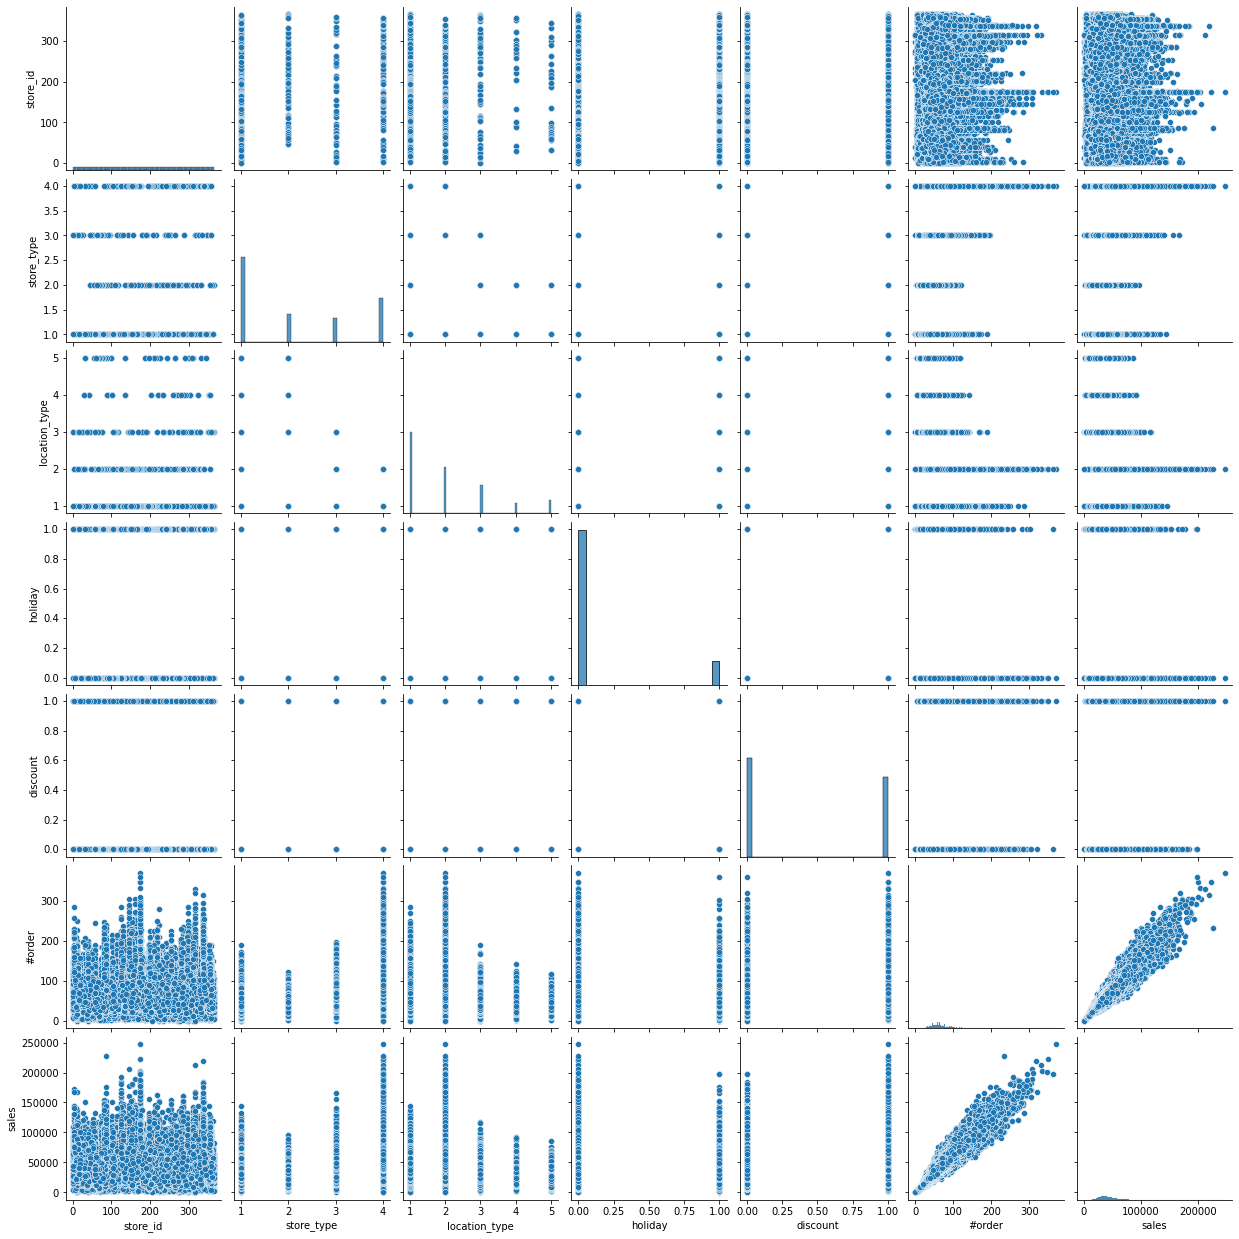

In [44]:
sns.pairplot(data)

In [45]:
data.describe()

,store_id,store_type,location_type,holiday,discount,#order,sales
count,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,2.147945,2.043836,0.131783,0.447536,68.205692,42784.327982
std,105.366308,1.247479,1.226758,0.338256,0.497241,30.467415,18456.708302
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,1.000000,1.000000,0.000000,0.000000,48.000000,30426.000000
50%,183.000000,2.000000,2.000000,0.000000,0.000000,63.000000,39678.000000
75%,274.000000,3.000000,3.000000,0.000000,1.000000,82.000000,51909.000000
max,365.000000,4.000000,5.000000,1.000000,1.000000,371.000000,247215.000000


In [46]:
data.corr()

,store_id,store_type,location_type,holiday,discount,#order,sales
store_id,1.000000e+00,8.627203e-02,6.729649e-02,5.380970e-16,-0.000693,0.028290,0.004377
store_type,8.627203e-02,1.000000e+00,-1.009121e-01,7.016277e-16,0.002121,0.583800,0.492471
location_type,6.729649e-02,-1.009121e-01,1.000000e+00,6.217699e-16,0.000419,-0.248567,-0.283771
holiday,5.380970e-16,7.016277e-16,6.217699e-16,1.000000e+00,0.019545,-0.140496,-0.154779
discount,-6.928774e-04,2.121497e-03,4.190224e-04,1.954527e-02,1.000000,0.233374,0.323906
#order,2.828985e-02,5.838000e-01,-2.485666e-01,-1.404963e-01,0.233374,1.000000,0.941601
sales,4.376631e-03,4.924707e-01,-2.837714e-01,-1.547788e-01,0.323906,0.941601,1.000000


In [14]:
data['discount'] = data['discount'].map({'No':0, 'Yes':1})

In [15]:
data.discount.unique()

array([1, 0])

In [16]:
data.discount.value_counts()

0    104051
1     84289
Name: discount, dtype: int64

In [25]:
test = dict(zip(data.store_type.unique(), (1,4,3,2)))
test

{'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4}

In [26]:
data['store_type'] = data['store_type'].map({'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4})

In [27]:
data.store_type.unique()

array([1, 4, 3, 2])

In [28]:
data.store_type.value_counts()

1    88752
4    45924
2    28896
3    24768
Name: store_type, dtype: int64

In [32]:
test2 = dict(zip(data.location_type.unique(), (3,2,1,5,4)))
test2

{'L1': 1, 'L2': 2, 'L3': 3, 'L4': 4, 'L5': 5}

In [33]:
data['location_type'] = data['location_type'].map(test2)

In [35]:
data.location_type.value_counts()

1    85140
2    48504
3    29928
5    13932
4    10836
Name: location_type, dtype: int64

In [36]:
data.location_type.unique()

array([3, 2, 1, 5, 4])

In [37]:
data.isnull().sum()

id               0
store_id         0
store_type       0
location_type    0
region_code      0
date             0
holiday          0
discount         0
#order           0
sales            0
dtype: int64

In [38]:
data.dropna()

,id,store_id,store_type,location_type,region_code,date,holiday,discount,#order,sales
0,T1000001,1,1,3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,4,2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,3,2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,2,3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,2,3,R4,2018-01-01,1,1,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,2,3,R2,2019-05-31,1,1,51,37272.00
188336,T1188337,153,4,2,R1,2019-05-31,1,0,90,54572.64
188337,T1188338,154,1,3,R2,2019-05-31,1,0,56,31624.56
188338,T1188339,155,3,1,R2,2019-05-31,1,1,70,49162.41


In [39]:
x = np.array(data[['store_type', 'location_type', 'holiday', 'discount']])
y = np.array(data['#order'])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((150672, 4), (37668, 4), (150672,), (37668,))

In [42]:
import lightgbm as ltb

In [48]:
model = ltb.LGBMRegressor()
model.fit(xtrain, ytrain)

LGBMRegressor()

In [49]:
ypred = model.predict(xtest)
data3 = pd.DataFrame(data={'Predicted orders': ypred.flatten()})
data3.head()

,Predicted orders
0,47.351897
1,97.068717
2,66.577788
3,85.143083
4,54.451098


In [53]:
data3.shape

(37668, 1)

In [52]:
model.score(xtest, ytest)

0.5921403928199311